![title](director_shot.jpeg)

## Final Project Submission

* Student name: SAMUEL KIIO KYALO
* Student pace: full time

## OVERVIEW

(A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.)


## BUSINESS PROBLEM

Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. 
This project seeks to explore what types of films are currently doing the best at the box office and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
Given that the Microsoft don't know anything about creating movies, this project describes the factors to consider when creating new movies. It uses the data available to describe the relationship between popularity/rating of movies, which demonstrates the consumer's preference, compared to attributes of these movies including their run time, genre, language and financial resources invested in them (budgets)

## Data Understanding

The data is taken from different locations and includes data from:
1. IMDB which is located in a SQLite database. Certain characteristics such as language, run-time, attribues and ratings are described in this dataset. The tables used in this dataset are the movie_basics table, the movie_ratings table and the movie_akas table. 
2. The Movie DB shows the genre, language and popularity of a set of 26,516 movies
3. The numbers dataset describes production budget and is used to compare the profitability of domestic vs worldide markets

## DATA EXPLORATION

In [150]:
# ImportING standard packages and their aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
%matplotlib inline

### 1.  Exploring the IMDB database

In [151]:
# Connecting to the IMDB database and displaying all the tables
conn = sqlite3.connect('im.db')
data = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', conn) 

data


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [152]:
# Selecting all columns from the movie_akas table and displaying a sample of its contents
movie_akas = pd.read_sql('''SELECT * FROM movie_akas;''', conn)
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [153]:
# Displaying the table information
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [154]:
# Checking for missing values values
movie_akas.isnull().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

The dataset contains many missing values particularly in the region, language, types and attributes columns. 

In [155]:
# Connecting to the movie_basics table to preview the data

movie_basics = pd.read_sql('''SELECT * FROM movie_basics;''', conn)
movie_basics.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [156]:
#Displaying the table information
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The movie_basics table has many missing values

In [157]:
#Movie ratings table
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [158]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [159]:
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

The movie ratings table has no missing values

### 2. Exploring data from The Movie DB

In [160]:
# Reading from the database and previewing the data
The_Movie = pd.read_csv('tmdb.movies.csv.gz')
The_Movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [161]:
The_Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [162]:
#Checking for missing values
The_Movie.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The database contains no missing values

### 3. Exploring The Numbers DB

In [163]:
The_Numbers = pd.read_csv('tn.movie_budgets.csv.gz')
The_Numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [164]:
The_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The database contains no missing values. 

However from the data types shown, and comparing with the previewed data, it is clear that the columns: 'production_budjet', 'domestic gross' and worldwide gross are of the datatype 'object'. 

To perform arithmetic manipulations on those columns, they are converted to integer data types

### 4. Exploring Box Office Mojo database

In [165]:
#Reading the CSV file and looking at the data preview of the first 5 rows
BOM = pd.read_csv('bom.movie_gross.csv.gz')
BOM.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [166]:
#Looking at the database info
BOM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [167]:
#Checking for missing values
BOM.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#### The BOM dataset contains:
1. 5 Null studio values
2. 28 Null domestic gross values
3. 1350 Null foreign gross values
4. The foreign gross column is in the wrong data dype for the data it contains

## Data Preparation

### 1. Cleaning the BOX Office Mojo dataset

* The missing domestic and foreign gross values were replaced with their respective median values as this has the least effect on the distribution of the dataset.
* The foreign_gross column was converted to string datatype

In [168]:
# Replacing missing domestic_gross values with the median of the column
BOM['domestic_gross'] = BOM['domestic_gross'].fillna(BOM['domestic_gross'].median())

# Removing string values from the foreign_gross column, converting it from 'object' to float datatype in order to use mathemetical functions on it
BOM['foreign_gross'] = pd.to_numeric(BOM.foreign_gross.str.replace('[^\d.]', ''))

# Replacing missing foreign_gross values with the median of the column
BOM['foreign_gross'] = BOM['foreign_gross'].fillna(BOM['foreign_gross'].median())

* Checking that the missing values have been removed

In [169]:
BOM.isnull().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

* For the missing studio values, since they are few compared to the total number of entries, the 5 rows missing the studio values were dropped

In [170]:
BOM = BOM.dropna()

* Confirming there are no missing values remaining

In [171]:
BOM.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### 2. Cleaning The Numbers Dataset

* Converting production budget, domestic gross and worldwide gross to integers to make them manipulatable by arithmetic methods

In [172]:

The_Numbers['production_budget'] = pd.to_numeric(The_Numbers.production_budget.str.replace('[^\d.]', ''))

The_Numbers['domestic_gross'] = pd.to_numeric(The_Numbers.domestic_gross.str.replace('[^\d.]', ''))

The_Numbers['worldwide_gross'] = pd.to_numeric(The_Numbers.worldwide_gross .str.replace('[^\d.]', ''))

### 3. Preparing the IMDB Database 

* Dropping duplicate values from the movie_akas table

In [173]:
movie_akas.drop_duplicates(subset="movie_id",
                     keep=False, inplace=True)

* Joining the movie_basics to the movie_akas and movie_ratings table

In [174]:
joined_IMDB = pd.read_sql( """SELECT
movie_basics.movie_id,
movie_basics.primary_title,
movie_basics.original_title,
movie_basics.start_year,
movie_basics.runtime_minutes,
movie_basics.genres,
movie_ratings.averagerating,
movie_ratings.numvotes,
movie_akas.ordering,
movie_akas.region,
movie_akas.language,
movie_akas.types,
movie_akas.attributes

FROM movie_basics
JOIN movie_ratings
  ON movie_basics.movie_id = movie_ratings.movie_id
JOIN movie_akas
  ON movie_akas.movie_id = movie_ratings.movie_id;""", conn)

joined_IMDB

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,region,language,types,attributes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,IN,hi,None,alternative transliteration
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,None,None,original,None
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,IN,None,None,None
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,IN,hi,None,alternative transliteration
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,IN,hi,None,alternative spelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,2,IN,en,None,literal English title
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,3,IN,None,None,None
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,1,None,None,original,None
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2,IN,ml,None,alternative spelling


## Data Analysis

### 1. Looking at the most popular regions based on the number of movies in the dataset.


* Information on the most popular regions is important as it will enable microsoft to know what regions to focus on in their movie production business.
* The movie_akas table in the IMDB SQL database was used to find the top 5 regions with the highest number of movies 

In [175]:
movie_akas['region'].value_counts().head()

US    32728
IN     5246
GB     4728
CA     3683
FR     2559
Name: region, dtype: int64

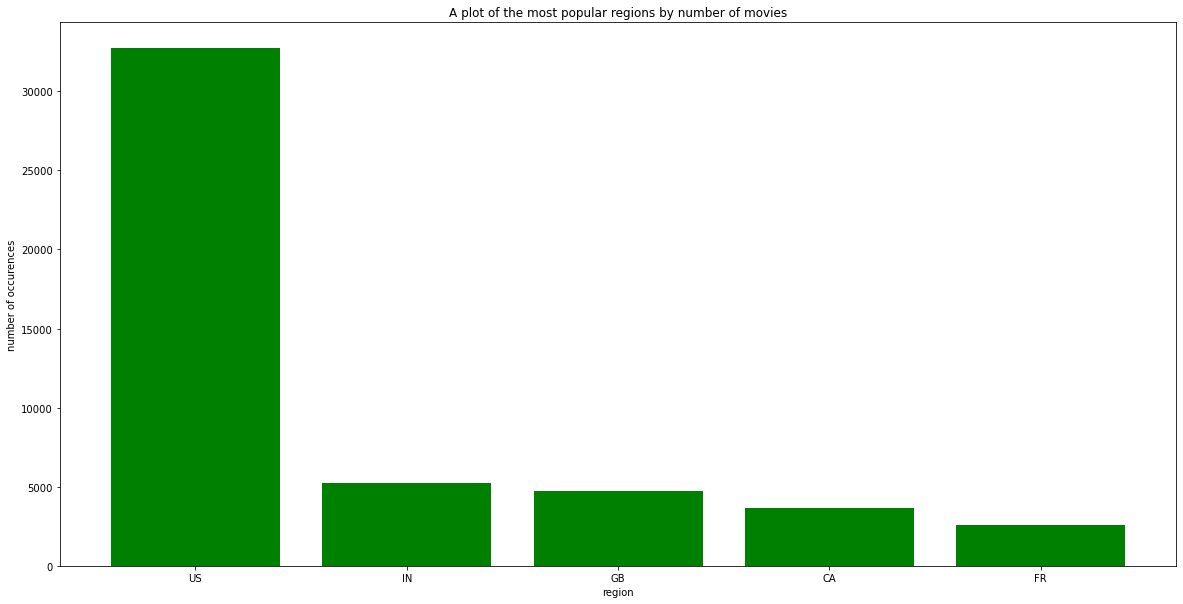

In [176]:
region = ['US', 'IN', 'GB', 'CA', 'FR']
entries = [32728, 5246, 4728, 3683, 2559]

popular_regions = plt.figure(figsize = (20, 10))

 
# creating the bar plot
plt.bar(region, entries, color ='green')

plt.xlabel('region')
plt.ylabel('number of occurences')
plt.title('A plot of the most popular regions by number of movies')
plt.show()

* From the bar graph above, it is clear that the United States is the most popular region by a very large margin compared to the second country. It takes 66.87 % of all the movies.
* India is second with 5246 movies, representing 10.71% of total movies
* Great Britain comes third with a share of 9.66%
* Canada is 4th with 7.52%
* France comes 5th with a share of 5.23% 

### 2. Looking at the relationship between movie run-time in minutes and movie ratings

* This relationship seeks to find out whether viewers rate movies with either higher or lower movie run time highly.
* It seeks to find any correlation between the highly ranked movies and their run time.
* This information can be very useful to microsoft as it will help them know whether viewers prefer long movies or short movies.
* The correlation was investigated by plotting a scatter plot of run time in minutes vs average rating

In [177]:
# The joined IMDB table was sorted by the column 'averagerating' in ascending order
joined_IMDB.sort_values(by='averagerating', ascending=False, inplace=True)

# Finding the median number of votes, so that we select movies with a relatively large number of votes and omit those with few ratings
joined_IMDB['numvotes'].median()
most_popular_movies = joined_IMDB[joined_IMDB['numvotes'] > joined_IMDB['numvotes'].median() ]

# The dataset is grouped by movie_ID in order to eliminate instances similar repeated movies with other difering attributes
most_popular_runtime = most_popular_movies.groupby(['movie_id']).mean()
most_popular_runtime.sort_values(by='averagerating', ascending=False, inplace=True)
most_popular_runtime.head(10)

,start_year,runtime_minutes,averagerating,numvotes,ordering
movie_id,,,,,
tt7131622,2019.0,159.0,9.7,5600.0,15.0
tt6058226,2018.0,132.0,9.6,2604.0,2.0
tt4131686,2015.0,106.0,9.6,1339.0,1.0
tt6842524,2017.0,90.0,9.5,829.0,3.0
tt5963218,2017.0,113.0,9.5,6509.0,2.0
tt5624252,2016.0,86.0,9.4,927.0,1.0
tt7738784,2018.0,147.0,9.4,9629.0,3.5
tt5858514,2017.0,101.0,9.4,797.0,2.5
tt2170667,2014.0,115.0,9.3,17308.0,1.0


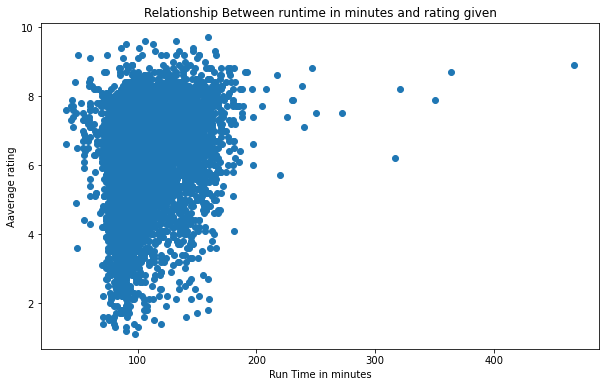

In [178]:
# plotting a scatter diagram

runetimefigure, ax = plt.subplots(figsize = (10,6))
plt.scatter(most_popular_runtime['runtime_minutes'], most_popular_runtime['averagerating'])

plt.xlabel('Run Time in minutes')
plt.ylabel('Aaverage rating' )
plt.title('Relationship Between runtime in minutes and rating given')
plt.show()

* The scatter plot shows that there is no correlation between average rating and the run time. 
* An increase or a decrease in run time does not relate to a change in the average rating.

### 3. Investigating whether the worldwide market is more profitable compared to the domestic market

* The Numbers Database was used for this analysis.
* Domestic profits and worldwide profits were calculated and two columns added to show the profits.
* A third column was added that compares the two values and determines which is greater, the domestic profits or the worldwide profits.
This investigation can be used to determine the focus on marketing and sales between the domestic or the global market.

In [179]:
#Creating a new columns named 'domestic profits' and 'worldwide_profits'
The_Numbers['domestic_profits'] = The_Numbers['domestic_gross'] - The_Numbers['production_budget']
The_Numbers['worldwide_profits'] = The_Numbers['worldwide_gross'] - The_Numbers['production_budget']

# Comparing worldwide profits to domestic profits to find out which is higher.
# Comparison returns 'True" if worldwide profits were larger than domestic profits.
The_Numbers['comparison'] = np.where((The_Numbers['worldwide_profits'] > The_Numbers['domestic_profits'])
                     , 'true', 'false')
# Displaying the table
The_Numbers


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits,comparison
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,true
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,true
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,true
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,true
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,true
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000,false
5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482,234495,true
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-3662,false
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-1400,false


In [180]:
#Comparing the percentage of true to false values
The_Numbers['comparison'].value_counts(True)

true     0.719993
false    0.280007
Name: comparison, dtype: float64

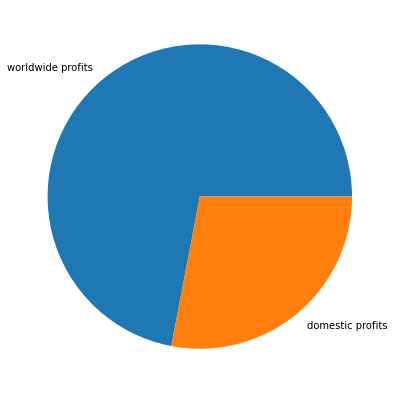

In [181]:
# The Pie Plot
profits = ['worldwide profits', 'domestic profits']
data = [71.999,28.000]

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = profits)

plt.show()


* The pie chart illustrates that in 71.999% of instances, worldwide profits were larger than domestic profits.
* This means that 71.999% of the moves in the dataset made more money from the worldwide market compared to the domestic market

### 4. Investigating the average production budgets for the top 5 movies in The Numbers Dataset

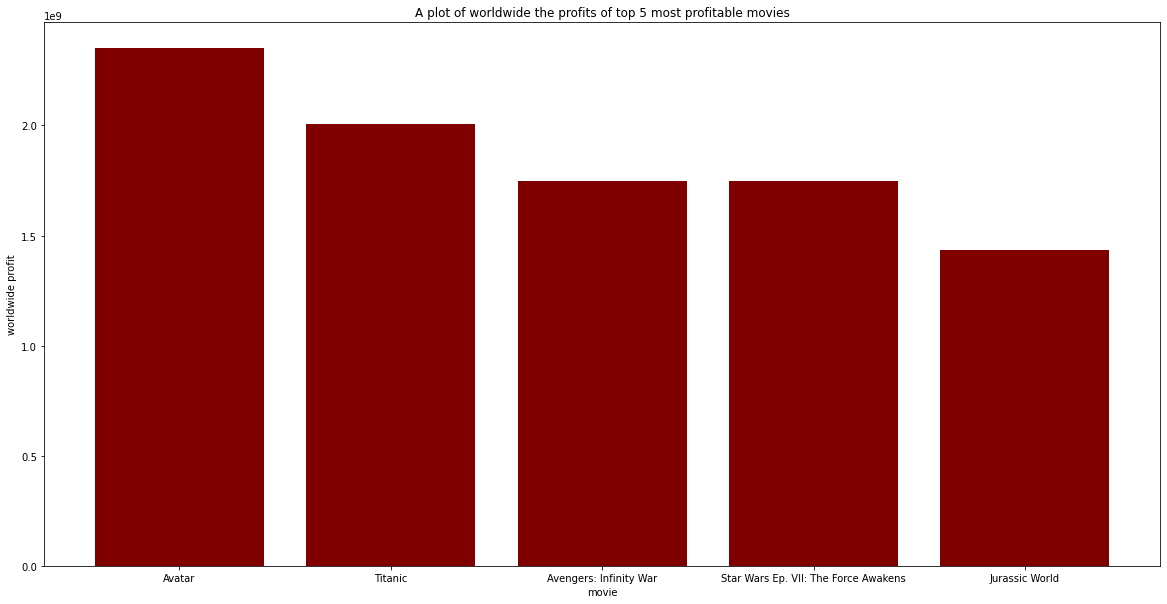

In [182]:
# Sorting the values by worldwide profits in descending order
The_Numbers.sort_values(by='worldwide_profits', ascending=False, inplace=True)

# Selecting the top five most profitable movies worldwide
top_five_most_profitable_movies = The_Numbers.head()

# Plotting the bar graph
profits = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(top_five_most_profitable_movies['movie'], top_five_most_profitable_movies['worldwide_profits'], color ='maroon')

plt.xlabel('movie')
plt.ylabel('worldwide profit' )
plt.title('A plot of worldwide the profits of top 5 most profitable movies')
plt.show()



In [183]:
average_production_budget = top_five_most_profitable_movies['production_budget'].mean()
average_domestic_profits = top_five_most_profitable_movies['domestic_profits'].mean()
average_global_profits = top_five_most_profitable_movies['worldwide_profits'].mean()

print("The domestic profits of the top 5 most profitable movies is: ", average_domestic_profits)
print("The average global profits of the top 5 most profitable movies is: ", average_global_profits)
print("The average cost of production of the top 5 most profitable movies is: ", average_production_budget)

The domestic profits of the top 5 most profitable movies is:  448323980.2
The average global profits of the top 5 most profitable movies is:  1857770791.6
The average cost of production of the top 5 most profitable movies is:  289200000.0


* From the plot, Avator is the most popular movie in the dataset followed by Titanic, Avengers Infinity War movie, Star Wars Ep VII The force Awekens and Jurassic World respectively.
* The average cost of production of these top movies is $ 289,200,000
* The domestic profits of the top 5 most profitable movies is $ 448,323,980.2
* The average global profits of the top 5 most profitable movies is $1,857,770,791.6

### 5. Investigating the original languages that the most popular movies were produced in:

* The Movie Database was used. 
* The data database was grouped by original language and sorted by popularity.
* This information will help Microsoft in the decison of what languages to produce their movies in

In [184]:
language = The_Movie.groupby(['original_language']).mean()
language.sort_values(by='popularity', ascending=False, inplace=True)
language.head()

,Unnamed: 0,id,popularity,vote_average,vote_count
original_language,,,,,
nb,2725.000000,46146.000000,8.221000,6.700000,806.000000
sw,24397.000000,517987.000000,7.440000,7.700000,28.000000
ja,14223.607547,267219.705660,5.711072,6.826792,206.694340
hz,2950.000000,74586.000000,5.495000,6.000000,44.000000
uk,13310.285714,293582.285714,5.331000,5.557143,93.857143


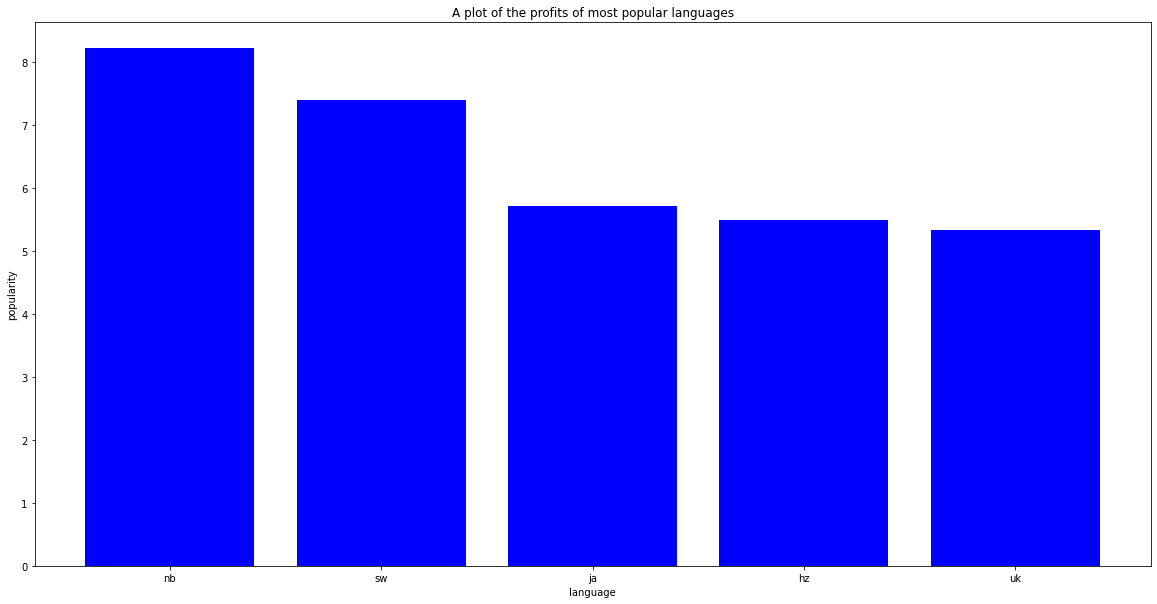

In [185]:
original_language = ['nb', 'sw', 'ja', 'hz', 'uk']
Popularity = [8.221000, 7.40000, 5.711072, 5.495000, 5.331000]
language = plt.figure(figsize = (20, 10))

 
# creating the bar plot
plt.bar(original_language, Popularity, color ='blue')

plt.xlabel('language')
plt.ylabel('popularity')
plt.title('A plot of the profits of most popular languages')
plt.show()

* The plot shows that the most popular original movie languages are as follows:
1. nb - Norwegian
2. sw - Swahili
3. ja - Japanese
4. hz - Simplified Chinese
5. uk - English

## Conclusion

* The conclusion is that the United States is the most popular region with 66.8% of all the movies.
* The data showed correlation between movie run - time and the popularity of a movie.
* The worldwide market is more profitable than the domestic market.
* The most popular original movie language is norwegian.

### The analysis could be improved in the following ways:

1. The analysis could be expanded to include the most popular genre of movies.
2. To show how attributes of the title of a movie could affect its popularity.
3. The analysis could include box plots to improve the analysis of movie ratings by not including movie ratings with a lower number of entries which could skew the result of an analysis.


## Business Recommendation
As the business begins its operations, it should:
1. Not only focus on the domestic market but the **global market as this offers the highest returns.**
2. Although there is no correlation between runtime and popularity, **the average movie time is 105 minutes for the best performing movies.**
3. **The firm should not only focus on English films,** despite the fact that the united states is the largest market, most top films are shown to originally be in a foreign language and this would help incease penetration in the global market where it is most profitable.